KAGGLE dataset

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! kaggle datasets download -d hasyimabdillah/workoutfitness-video

Drive

In [ ]:
!gdown --id '1GrS-e_OmFZmKfhGQJMM0zoFQ4HyOIynO'

In [ ]:
!unzip "/content/workoutfitness-video.zip" -d 'kaggle_data'

In [7]:
import shutil
checkpoints_path = '/content/output3/train/.ipynb_checkpoints'
shutil.rmtree(checkpoints_path, ignore_errors=True)
checkpoints_path = '/content/output3/val/.ipynb_checkpoints'
shutil.rmtree(checkpoints_path, ignore_errors=True)

In [2]:
import os
import csv

def count_videos(dataset_path):
    """Count the number of videos in each class of the dataset and organize by class."""
    stats = {}
    for split in ['train', 'val']:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            for class_name in os.listdir(split_path):
                class_path = os.path.join(split_path, class_name)
                if os.path.isdir(class_path):
                    videos = [f for f in os.listdir(class_path) if f.endswith(('.mp4', '.MOV', '.mov', '.avi'))]
                    if class_name not in stats:
                        stats[class_name] = {'train': 0, 'val': 0}
                    stats[class_name][split] += len(videos)
    return stats

def save_stats_to_csv(stats, output_csv):
    """Save the dataset statistics to a CSV file with a structure that includes serial numbers and a total column."""
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['#', 'Class', 'Train', 'Val', 'Total'])
        serial_number = 1
        for class_name, splits in sorted(stats.items()):
            total_videos = splits['train'] + splits['val']
            writer.writerow([serial_number, class_name, splits['train'], splits['val'], total_videos])
            serial_number += 1

dataset_path = '/content/kaggle_data'
output_csv = 'dataset_statistics.csv'

# Count videos and save the statistics
stats = count_videos(dataset_path)
save_stats_to_csv(stats, output_csv)

print(f'Statistics saved to {output_csv}')


Statistics saved to dataset_statistics.csv


In [ ]:
import os
import csv
import matplotlib.pyplot as plt

def count_videos(dataset_path):
    """Count the number of videos in each class of the dataset and organize by class."""
    stats = {}
    for split in ['train', 'val']:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            for class_name in os.listdir(split_path):
                class_path = os.path.join(split_path, class_name)
                if os.path.isdir(class_path):
                    videos = [f for f in os.listdir(class_path) if f.endswith(('.mp4', '.MOV', '.mov', '.avi'))]
                    if class_name not in stats:
                        stats[class_name] = {'train': 0, 'val': 0}
                    stats[class_name][split] += len(videos)
    return stats

def save_stats_to_csv(stats, output_csv):
    """Save the dataset statistics to a CSV file with a structure that includes serial numbers and a total column."""
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['#', 'Class', 'Train', 'Val', 'Total'])
        serial_number = 1
        for class_name, splits in sorted(stats.items()):
            total_videos = splits['train'] + splits['val']
            writer.writerow([serial_number, class_name, splits['train'], splits['val'], total_videos])
            serial_number += 1

def plot_histogram(stats, save_path=None):
    """Plot a histogram based on the dataset statistics."""
    classes = list(stats.keys())
    total_videos = [stats[class_name]['train'] + stats[class_name]['val'] for class_name in classes]

    plt.figure(figsize=(10, 6))
    plt.bar(classes, total_videos, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Total Videos')
    plt.title('Total Videos per Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f'Histogram saved as {save_path}')
    else:
        plt.show()

dataset_path = '/content/kaggle_data'
output_csv = 'dataset_statistics.csv'
histogram_image_path = 'dataset_histogram.png'

# Count videos and save the statistics
stats = count_videos(dataset_path)
save_stats_to_csv(stats, output_csv)

print(f'Statistics saved to {output_csv}')

# Plot histogram and save image
plot_histogram(stats, save_path=histogram_image_path)

Statistics saved to dataset_statistics.csv
Histogram saved as dataset_histogram.png


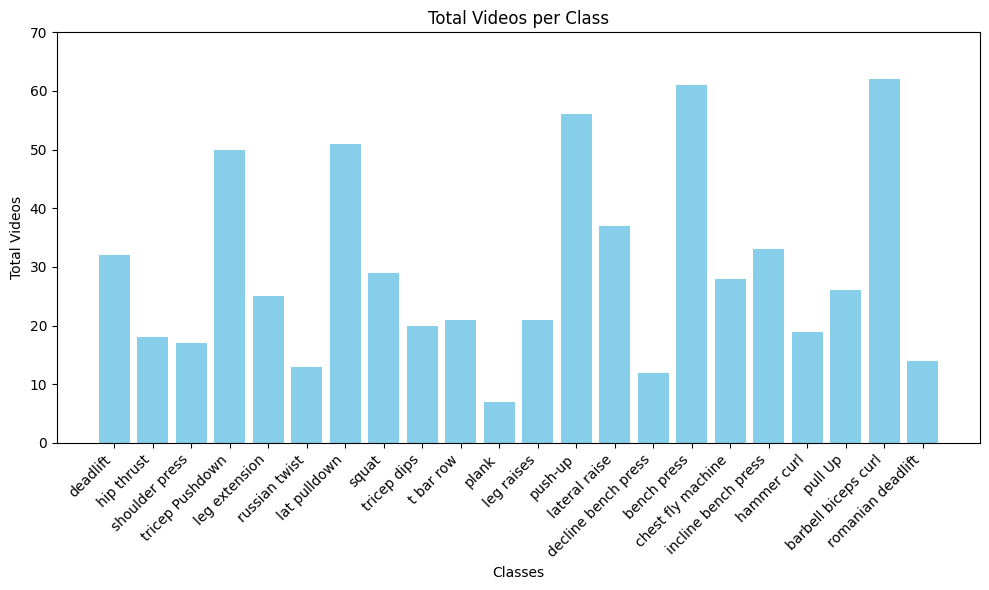

In [5]:
import os
import csv
import matplotlib.pyplot as plt

def count_videos(dataset_path):
    """Count the number of videos in each class of the dataset and organize by class."""
    stats = {}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            videos = [f for f in os.listdir(class_path) if f.endswith(('.mp4', '.MOV', '.mov', '.avi'))]
            stats[class_name] = {'total': len(videos)}
    return stats

def save_stats_to_csv(stats, output_csv):
    """Save the dataset statistics to a CSV file with a structure that includes serial numbers and a total column."""
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['#', 'Class', 'Total'])
        serial_number = 1
        for class_name, details in sorted(stats.items()):
            total_videos = details['total']
            writer.writerow([serial_number, class_name, total_videos])
            serial_number += 1

def plot_histogram(stats, save_path=None):
    """Plot a histogram based on the dataset statistics."""
    classes = list(stats.keys())
    total_videos = [stats[class_name]['total'] for class_name in classes]

    plt.figure(figsize=(10, 6))
    plt.bar(classes, total_videos, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Total Videos')
    plt.title('Total Videos per Class')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 70)  # Chỉnh thang đo từ 0 đến 70
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f'Histogram saved as {save_path}')
    else:
        plt.show()

dataset_path = '/content/kaggle_data'
output_csv = 'dataset_statistics.csv'
histogram_image_path = 'dataset_histogram.png'

# Count videos and save the statistics
stats = count_videos(dataset_path)
save_stats_to_csv(stats, output_csv)

print(f'Statistics saved to {output_csv}')

# Plot histogram and save image
plot_histogram(stats, save_path=histogram_image_path)